**Title:** "Trends in Alcohol Sales: A Time Series Analysis"

**Description:** This time series analysis explores the patterns and trends in alcohol sales over a specified period. By examining seasonal fluctuations, significant spikes, and declines, the analysis provides insights into consumer behavior, market dynamics, and the impact of external factors such as holidays, economic conditions, and public health initiatives. The findings aim to inform businesses and policymakers about consumption trends, enabling better forecasting and strategic planning in the alcohol industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfal = pd.read_csv(r"Alcohol_Sales.csv")

In [3]:
dfal

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
dfal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [5]:
dfal.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [6]:
dfal.loc[:,(dfal=='?').any()].columns

Index([], dtype='object')

# problem statement- forecast Alcohol sale for next 12 months (2019)

In [7]:
dfal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [8]:
dfal.DATE   = pd.to_datetime(dfal.DATE ,infer_datetime_format = True)

C:\Users\datascience\AppData\Local\Temp\ipykernel_7560\1180845055.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dfal.DATE   = pd.to_datetime(dfal.DATE ,infer_datetime_format = True)


In [9]:
dfal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            325 non-null    datetime64[ns]
 1   S4248SM144NCEN  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
dfal

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [11]:
dfal.columns

Index(['DATE', 'S4248SM144NCEN'], dtype='object')

In [12]:
dfal= dfal.set_index(['DATE'])

In [13]:
dfal

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


- checking for stationary series

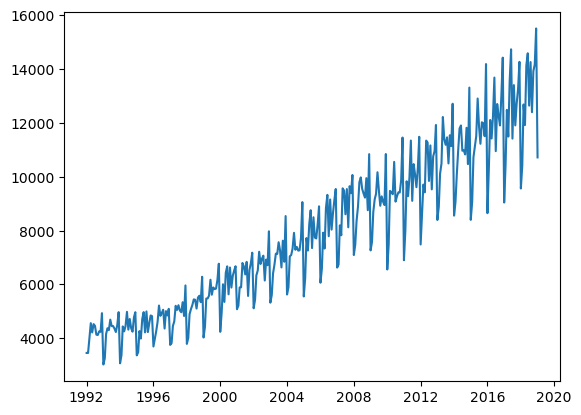

In [14]:
plt.plot(dfal)

In [15]:
dfal.diff()

,S4248SM144NCEN
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


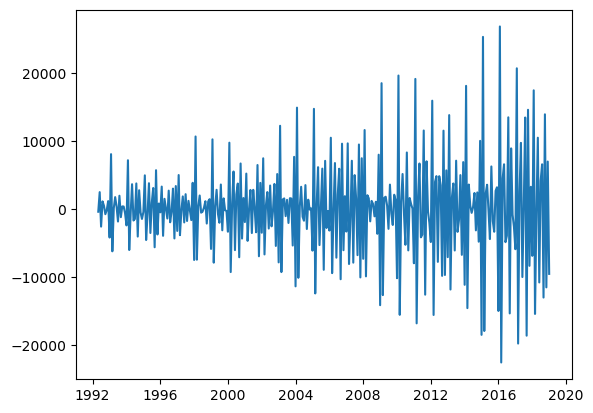

In [16]:
 plt.plot(dfal.diff().diff().diff().diff())

- Taking log

In [17]:
dfal_log = np.log(dfal)

In [18]:
dfal_log

,S4248SM144NCEN
DATE,
1992-01-01,8.148735
1992-02-01,8.148446
1992-03-01,8.294550
1992-04-01,8.425955
1992-05-01,8.347827
...,...
2018-09-01,9.425129
2018-10-01,9.540651
2018-11-01,9.559165


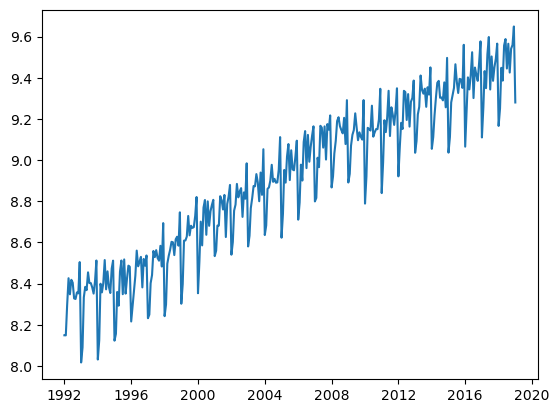

In [19]:
plt.plot(dfal_log)

In [20]:
dfal_log.diff()

,S4248SM144NCEN
DATE,
1992-01-01,NaN
1992-02-01,-0.000289
1992-03-01,0.146104
1992-04-01,0.131405
1992-05-01,-0.078127
...,...
2018-09-01,-0.139874
2018-10-01,0.115522
2018-11-01,0.018514


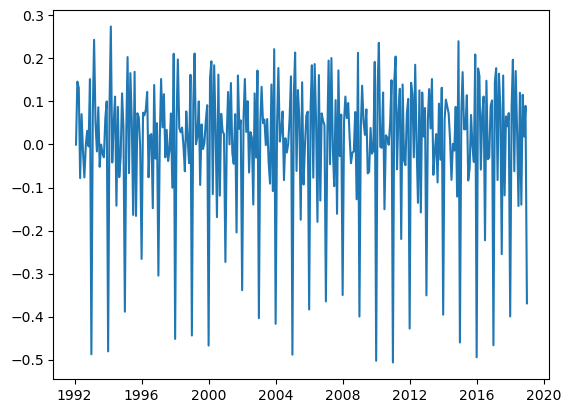

In [21]:
plt.plot(dfal_log.diff())

- value of d = 1

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

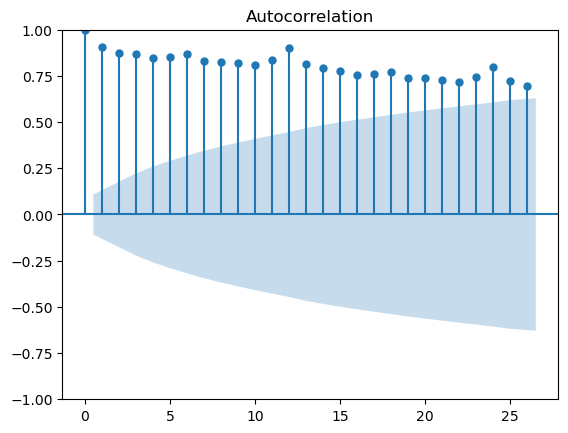

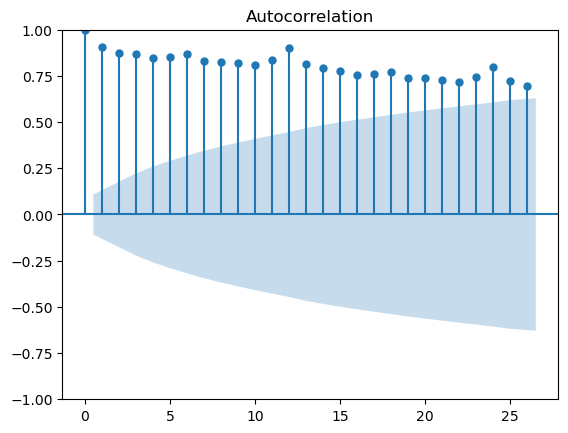

In [23]:
plot_acf(dfal_log)

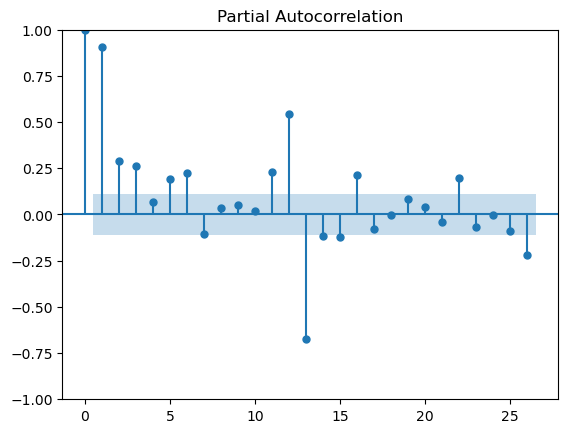

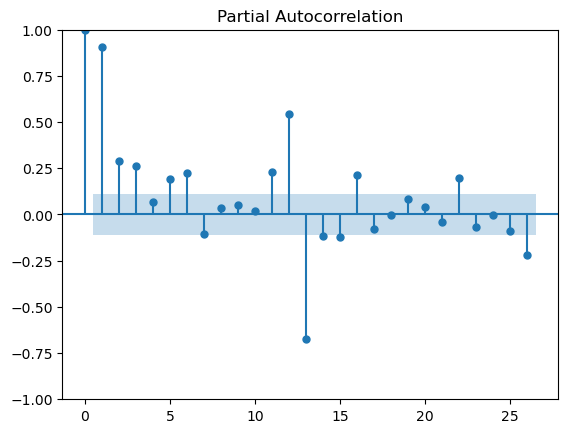

In [24]:
plot_pacf(dfal_log)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [26]:
# chcking seasonality
result = seasonal_decompose(dfal_log)

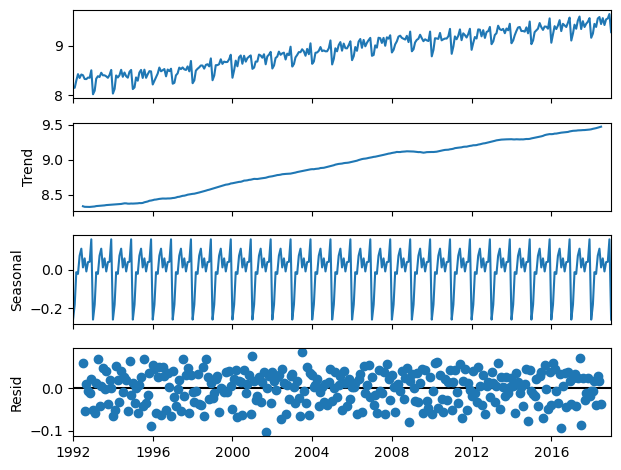

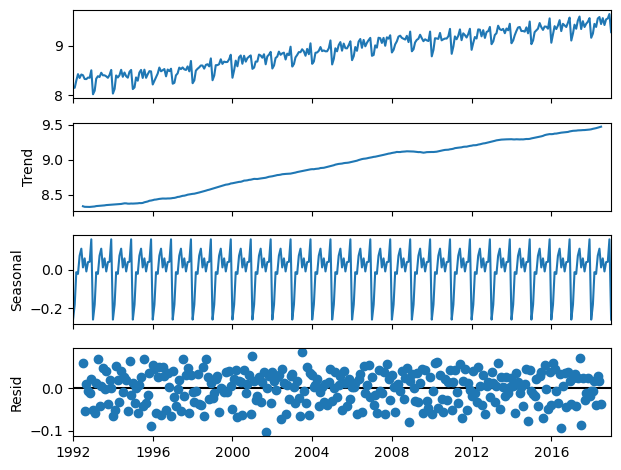

In [27]:
result.plot()

In [28]:
auto_arima(dfal_log,seasonal = True ,m=12);                                                                                                                                                                                         

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [36]:
model_sarima = SARIMAX(dfal_log,order=(4,1,0),seasonal_order = (1,0,2,12))

C:\Users\datascience\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\datascience\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
alcohol_model = model_sarima.fit()

C:\Users\datascience\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
pred_values = alcohol_model.predict(start=325,end=335) #even values

In [39]:
pred_values

2019-02-01    9.342011
2019-03-01    9.518528
2019-04-01    9.505985
2019-05-01    9.613213
2019-06-01    9.657349
2019-07-01    9.540193
2019-08-01    9.620658
2019-09-01    9.534162
2019-10-01    9.610623
2019-11-01    9.619201
2019-12-01    9.737752
Freq: MS, Name: predicted_mean, dtype: float64

In [40]:
pred_values1 = np.exp(pred_values)

In [41]:
pred_values1

2019-02-01    11407.325452
2019-03-01    13609.557022
2019-04-01    13439.921109
2019-05-01    14961.162834
2019-06-01    15636.281927
2019-07-01    13907.626174
2019-08-01    15072.968046
2019-09-01    13824.005639
2019-10-01    14922.470767
2019-11-01    15051.025809
2019-12-01    16945.410242
Freq: MS, Name: predicted_mean, dtype: float64

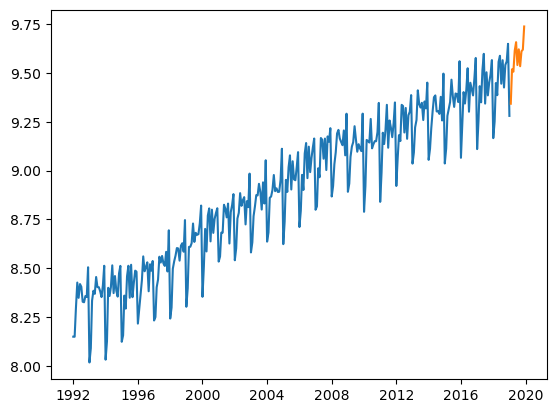

In [43]:
plt.plot(dfal_log)
plt.plot(pred_values)

In [46]:
df = pd.DataFrame()
df["predicted"] = pred_values1
date_for_pred = ["2019-02-01","2019-03-01" ,"2019-04-01" ,"2019-05-01" ,"2019-06-01" ,"2019-07-01" ,"2019-08-01" ,"2019-09-01" ,"2019-10-01" ,"2019-11-01" ,"2019-12-01"]
df["Month"] = date_for_pred
df["Month"] = pd.to_datetime(df.Month,infer_datetime_format = True)
df = df.set_index("Month")

C:\Users\datascience\AppData\Local\Temp\ipykernel_7560\483033578.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Month"] = pd.to_datetime(df.Month,infer_datetime_format = True)


In [47]:
df

,predicted
Month,
2019-02-01,11407.325452
2019-03-01,13609.557022
2019-04-01,13439.921109
2019-05-01,14961.162834
2019-06-01,15636.281927
2019-07-01,13907.626174
2019-08-01,15072.968046
2019-09-01,13824.005639
2019-10-01,14922.470767


In [48]:
dfal

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='Month'>

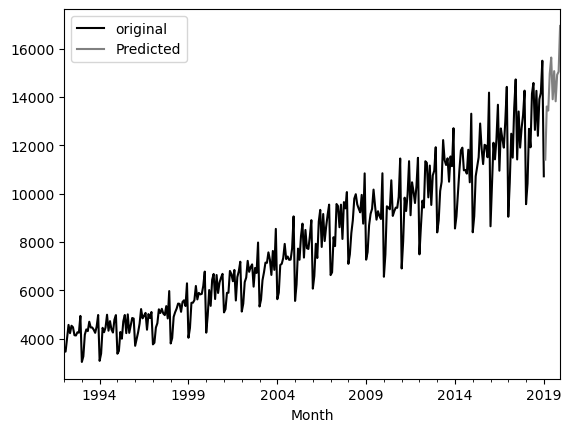

In [52]:
dfal["S4248SM144NCEN"].plot(legend = True,label="original",color="black")
df["predicted"].plot(legend =True,label = "Predicted",color="grey")